In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
usnews = pd.read_csv('usnews_data.csv')

# define a function to categorize colleges based on state code:
def get_region(state_code):
    northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
    southeast = ['AL', 'FL', 'GA', 'KY', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'DC', 'MD']
    midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
    southwest = ['AR', 'LA', 'OK', 'TX']
    northwest = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

    if state_code in northeast:
        return 'Northeast'
    elif state_code in southeast:
        return 'Southeast'
    elif state_code in midwest:
        return 'Midwest'
    elif state_code in southwest:
        return 'Southwest'
    elif state_code in northwest:
        return 'Northwest'
    else:
        return 'Unknown'
    
# define a function to map 1 and 2 as Public and Private college types:
def get_category(category):
    
    if category == 1:
        return 'Public'
    elif category == 2:
        return 'Private'

# apply the get_region and get_category function:
usnews['Region'] = usnews['State (PC)'].apply(get_region)
usnews['Type'] = usnews['Public/Private'].apply(get_category)

# remove blank entries
usnews.replace('*', pd.NA)
usnews_df = usnews.dropna()
usnews['No. of Applications Accepted'] = pd.to_numeric(usnews['No. of Applications Accepted'], errors='coerce')
usnews['No. of Applications Received'] = pd.to_numeric(usnews['No. of Applications Received'], errors='coerce')

usnews['Room and Board Costs'] = pd.to_numeric(usnews['Room and Board Costs'], errors='coerce')
usnews['Room Costs'] = pd.to_numeric(usnews['Room Costs'], errors='coerce')
usnews['Board Costs'] = pd.to_numeric(usnews['Board Costs'], errors='coerce')
usnews['Additional Fees'] = pd.to_numeric(usnews['Additional Fees'], errors='coerce')
usnews['Estimated Book Costs'] = pd.to_numeric(usnews['Estimated Book Costs'], errors='coerce')
usnews['Estimated Personal Spending'] = pd.to_numeric(usnews['Estimated Personal Spending'], errors='coerce')

usnews['Acceptance Rate'] = usnews['No. of Applications Accepted'] / usnews['No. of Applications Received']
usnews['Total Expense'] = usnews['Room and Board Costs'] + usnews['Room Costs'] + usnews['Board Costs'] + usnews['Additional Fees'] + usnews['Estimated Book Costs'] + usnews['Estimated Personal Spending']
usnews['Acceptance Rate'] = np.where(usnews['Acceptance Rate'].isnull(), "*", usnews['Acceptance Rate'])

# display the updated DataFrame
print(usnews.head())

      FICE                       College Name State (PC)  Public/Private  \
0      NaN                                NaN        NaN             NaN   
1   1061.0          Alaska Pacific University         AK             2.0   
2   1063.0  University of Alaska at Fairbanks         AK             1.0   
3   1065.0     University of Alaska Southeast         AK             1.0   
4  11462.0  University of Alaska at Anchorage         AK             1.0   

  Avg. Math SAT Avg. Verbal SAT Avg. Combined SAT Avg. ACT  \
0           NaN             NaN               NaN      NaN   
1           490             482               972       20   
2           499             462               961       22   
3             *               *                 *        *   
4           459             422               881       20   

  1st Quartile - Math SAT 3rd Quartile - Math SAT  ...  \
0                     NaN                     NaN  ...   
1                     440                     530  ...

***
### Q1. GR Distribution Plot is Gaussian (Normal)
***

C:\Users\Akshat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Graduation Rate', ylabel='Density'>

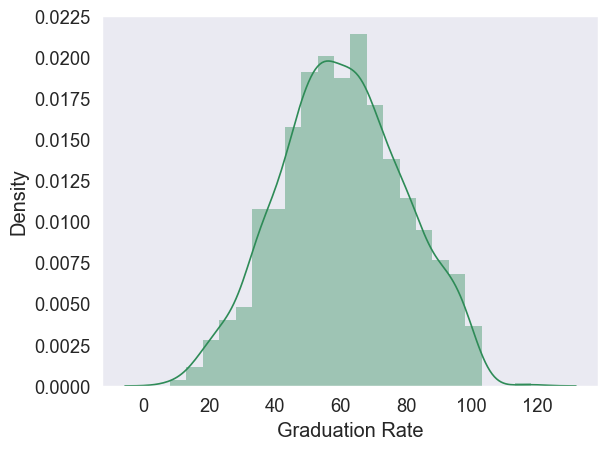

In [21]:
usnews = usnews[usnews['Graduation Rate'] != '*']
sns.set_style("dark", {"font.size": 12})
sns.distplot(usnews['Graduation Rate'], color='seagreen', kde=True, hist_kws={"edgecolor": "white", "linewidth": 0})

***
### Q2(a). SAT & ACT sweet-spot for colleges with GR < 40
***

<Figure size 1000x1000 with 0 Axes>

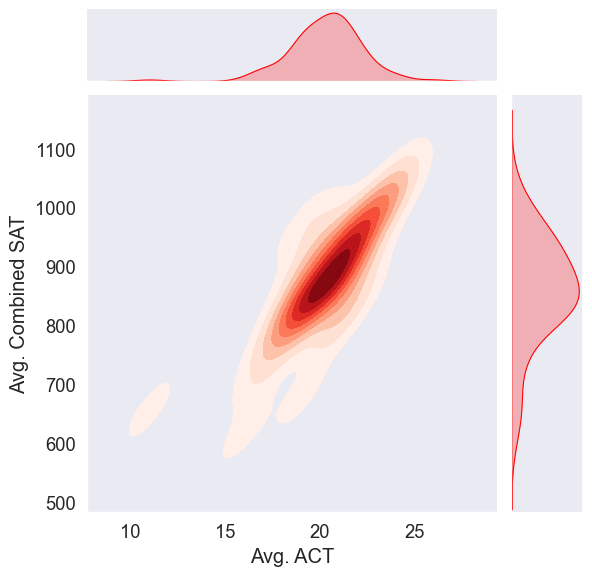

In [23]:
usnews_df = usnews.replace('*', np.nan)
usnews_df = usnews_df[pd.to_numeric(usnews_df['Graduation Rate'], errors='coerce') < 40]
usnews_df['Avg. ACT'] = usnews_df['Avg. ACT'].astype(float)
usnews_df['Avg. Combined SAT'] = usnews_df['Avg. Combined SAT'].astype(float)

plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context('paper', font_scale=1.5)
sns.jointplot(x='Avg. ACT', y='Avg. Combined SAT', data=usnews_df, kind='kde', cmap="Reds", fill=True, color='red')

***
### Q2(b). SAT & ACT sweet-spot for colleges with GR > 80
***

<Figure size 1000x1000 with 0 Axes>

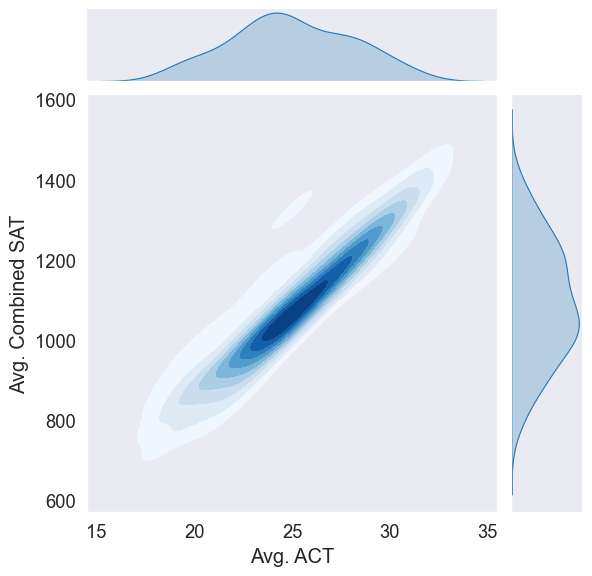

In [24]:
usnews_df = usnews.replace('*', np.nan)
usnews_df = usnews_df[pd.to_numeric(usnews_df['Graduation Rate'], errors='coerce') > 80]
usnews_df['Avg. ACT'] = usnews_df['Avg. ACT'].astype(float)
usnews_df['Avg. Combined SAT'] = usnews_df['Avg. Combined SAT'].astype(float)

plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context('paper', font_scale=1.5)
sns.jointplot(x='Avg. ACT', y='Avg. Combined SAT', data=usnews_df, kind='kde', cmap="Blues", fill=True)

***
### Q3. In-State and Out-of-State Tuition for Public vs Private Institutes
***

<Figure size 1000x1000 with 0 Axes>

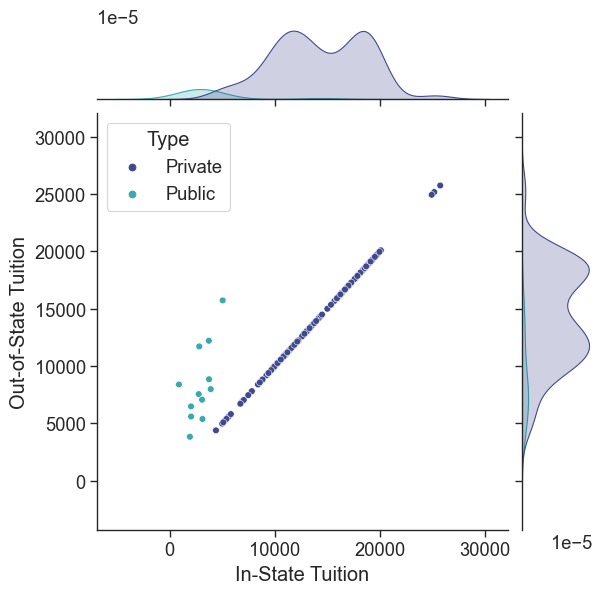

In [32]:
usnews_df = usnews_df[usnews_df['In-State Tuition'] != '*']
usnews_df = usnews_df[usnews_df['Out-of-State Tuition'] != '*']
usnews_df['In-State Tuition'] = pd.to_numeric(usnews_df['In-State Tuition'])
usnews_df['Out-of-State Tuition'] = pd.to_numeric(usnews_df['Out-of-State Tuition'])
sns.set_style("ticks")
plt.figure(figsize=(10,10))
sns.set_context(font_scale = 1.5)
sns.jointplot(data=usnews_df, x = 'In-State Tuition', y = 'Out-of-State Tuition', hue='Type', palette='mako')

***
### Q4. Graduation Rate and Acceptance Rate of Public vs Private
***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x800 with 0 Axes>

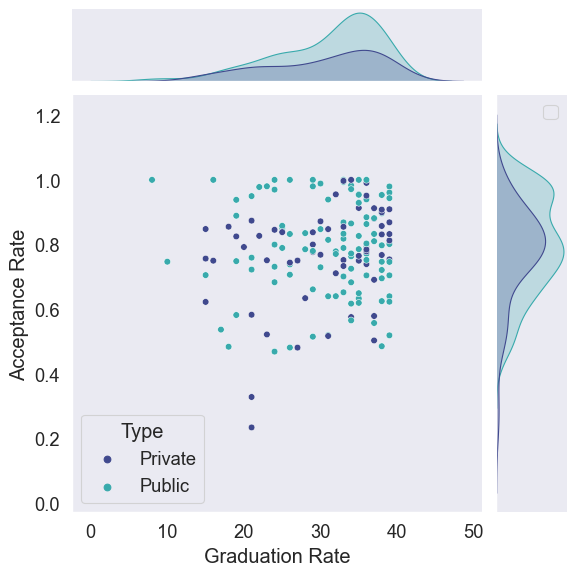

In [17]:
usnews_df = usnews_df[usnews_df['Graduation Rate'] != '*']
usnews_df = usnews_df[usnews_df['Acceptance Rate'] != '*']
usnews_df['Graduation Rate'] = pd.to_numeric(usnews_df['Graduation Rate'])
usnews_df['Acceptance Rate'] = pd.to_numeric(usnews_df['Acceptance Rate'])
plt.figure(figsize=(10,8))
sns.set_style('dark')
sns.set_context(font_scale = 1.5)
sns.jointplot(data=usnews_df, x = 'Graduation Rate', y = 'Acceptance Rate', hue='Type', palette='mako')
plt.legend(loc=0)

 ***
 ### Q5. Spending vs Region
 ***

Text(0, 0.5, 'Total Expenditure (in USD)')

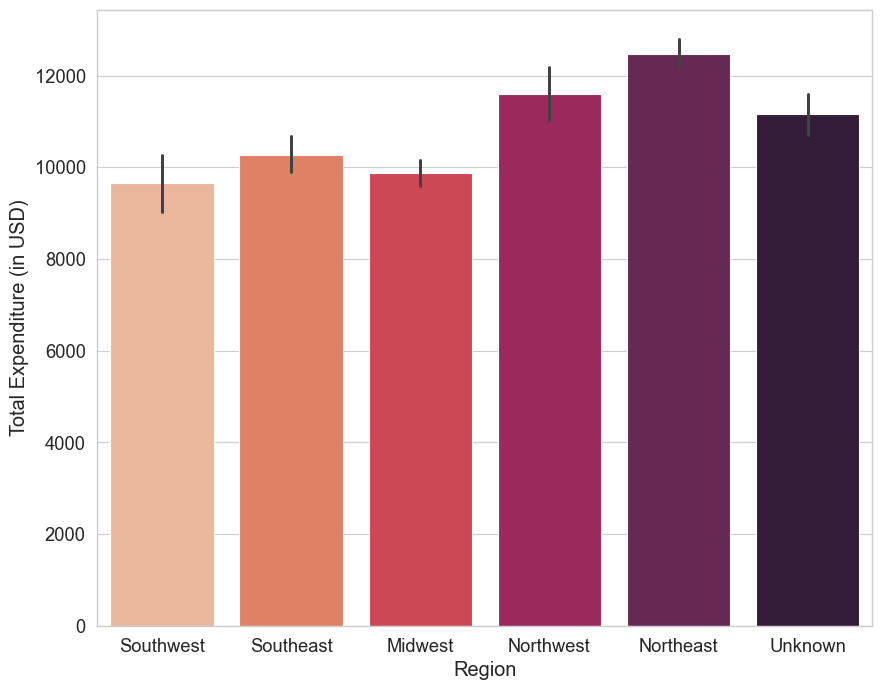

In [28]:
sorted_usnews = usnews.sort_values('Total Expense')
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
palette = sns.color_palette("rocket", len(sorted_usnews['Region'].unique()))[::-1]
ax = sns.barplot(x='Region', y='Total Expense', data=sorted_usnews, order=sorted_usnews['Region'].unique(), palette=palette)
ax.set_xlabel('Region')
ax.set_ylabel('Total Expenditure (in USD)')

# THE END OF USNEWS DATASET.
***